In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data = pd.read_excel('ecology_with_index.xlsx')
print('Форма данных:', data.shape)

Форма данных: (1323, 46)


In [47]:
data.head()

,Unnamed: 0.1,Unnamed: 0,id,"Отрасль экономики, к которой относится фирма",Размер фирмы,"Федеральный округ, в котором проводился опрос фирмы","Вид услуг, оказываемых фирмой",Организационно-правовая форма фирмы,В каком году фирма начала деятельность,В какой степени экологическое регулирование является препятствием в текущей деятельности?,...,Меры по ограничению загрязнения окружающей среды,Какая мера в наибольшей степени способствовала уменьшению воздействия на окружающую среду?,Последние 3 года фирма принимала меры для повышения энергоэффективности?,"Какова основная причина того, что меры для повышения энергоэффективности не применялись?",Была ли фирма обложена налогом на потребление энергии в прошлом финансовом году?,Были ли фирма обязана следовать каким-либо стандартам потребления энергии в прошлом году?,"Объём электроэнергии, потреблённой фирмой в прошлом финансовом году","Объём бензинового топлива, потреблённого фирмой в прошлом финансовом году",Единицы измерения объёма потреблённого бензина,involve in ecology index
0,0,0,22,Готовые Металлические Изделия,Малый,Центральный Федеральный округ,Производство,Акционерная компания с неторгуемыми акциями ил...,2007,Среднее препятствие,...,0,Модернизация машин и оборудования,1,NaN,Нет,Нет,100000,20000,Литры,0.254620
1,1,1,29,Машины и оборудование,Крупный,Центральный Федеральный округ,Производство,Акционерная компания с неторгуемыми акциями ил...,2002,Среднее препятствие,...,0,Модернизация машин и оборудования,0,Не является приоритетом по сравнению с другими...,Нет,Нет,160000,18500,Литры,0.181222
2,2,2,34,Другое Производство,Средний,Центральный Федеральный округ,Производство,Акционерная компания с неторгуемыми акциями ил...,2005,Незначительное препятствие,...,-1,NaN,0,Нехватка финансовых ресурсов,Нет,Нет,Не знаю,Не знаю,NaN,0.053388
3,3,3,50,Готовые Металлические Изделия,Малый,Центральный Федеральный округ,Другие услуги,Акционерная компания с неторгуемыми акциями ил...,2015,Не является препятствием,...,0,NaN,0,Операционный и/ или технический риск,Нет,Нет,Не знаю,Не знаю,NaN,0.000000
4,4,4,56,Другие Услуги,Малый,Центральный Федеральный округ,Другие услуги,Акционерная компания с неторгуемыми акциями ил...,2002,Среднее препятствие,...,-1,Модернизация машин и оборудования,0,Нехватка финансовых ресурсов,Нет,Нет,100000,10000,Литры,0.208726


In [48]:
data["Позиция, которую занимает экологическое регулирование, среди других предложенных вариантов возможных препятствий для осуществления деятельности"] = data["Позиция, которую занимает экологическое регулирование, среди других предложенных вариантов возможных препятствий для осуществления деятельности"] / 10

mapping = {
    'Не является препятствием': 0,
    'Незначительное препятствие': 0.25,
    'Среднее препятствие': 0.5,
    'Серьезное препятствие': 0.75,
    'Очень серьезное препятствие': 1,
    'Не знаю': -1,
    'Не применимо': -1,
}

# Map the values and replace them in the DataFrame
data['В какой степени экологическое регулирование является препятствием в текущей деятельности?'] = data["В какой степени экологическое регулирование является препятствием в текущей деятельности?"].map(mapping)
data.head(5)

,Unnamed: 0.1,Unnamed: 0,id,"Отрасль экономики, к которой относится фирма",Размер фирмы,"Федеральный округ, в котором проводился опрос фирмы","Вид услуг, оказываемых фирмой",Организационно-правовая форма фирмы,В каком году фирма начала деятельность,В какой степени экологическое регулирование является препятствием в текущей деятельности?,...,Меры по ограничению загрязнения окружающей среды,Какая мера в наибольшей степени способствовала уменьшению воздействия на окружающую среду?,Последние 3 года фирма принимала меры для повышения энергоэффективности?,"Какова основная причина того, что меры для повышения энергоэффективности не применялись?",Была ли фирма обложена налогом на потребление энергии в прошлом финансовом году?,Были ли фирма обязана следовать каким-либо стандартам потребления энергии в прошлом году?,"Объём электроэнергии, потреблённой фирмой в прошлом финансовом году","Объём бензинового топлива, потреблённого фирмой в прошлом финансовом году",Единицы измерения объёма потреблённого бензина,involve in ecology index
0,0,0,22,Готовые Металлические Изделия,Малый,Центральный Федеральный округ,Производство,Акционерная компания с неторгуемыми акциями ил...,2007,0.50,...,0,Модернизация машин и оборудования,1,NaN,Нет,Нет,100000,20000,Литры,0.254620
1,1,1,29,Машины и оборудование,Крупный,Центральный Федеральный округ,Производство,Акционерная компания с неторгуемыми акциями ил...,2002,0.50,...,0,Модернизация машин и оборудования,0,Не является приоритетом по сравнению с другими...,Нет,Нет,160000,18500,Литры,0.181222
2,2,2,34,Другое Производство,Средний,Центральный Федеральный округ,Производство,Акционерная компания с неторгуемыми акциями ил...,2005,0.25,...,-1,NaN,0,Нехватка финансовых ресурсов,Нет,Нет,Не знаю,Не знаю,NaN,0.053388
3,3,3,50,Готовые Металлические Изделия,Малый,Центральный Федеральный округ,Другие услуги,Акционерная компания с неторгуемыми акциями ил...,2015,0.00,...,0,NaN,0,Операционный и/ или технический риск,Нет,Нет,Не знаю,Не знаю,NaN,0.000000
4,4,4,56,Другие Услуги,Малый,Центральный Федеральный округ,Другие услуги,Акционерная компания с неторгуемыми акциями ил...,2002,0.50,...,-1,Модернизация машин и оборудования,0,Нехватка финансовых ресурсов,Нет,Нет,100000,10000,Литры,0.208726


0       0.254620
1       0.181222
2       0.053388
3       0.000000
4       0.208726
          ...   
1318    0.180732
1319    0.137293
1320    0.036463
1321    0.295592
1322    0.385731
Name: involve in ecology index, Length: 1323, dtype: float64

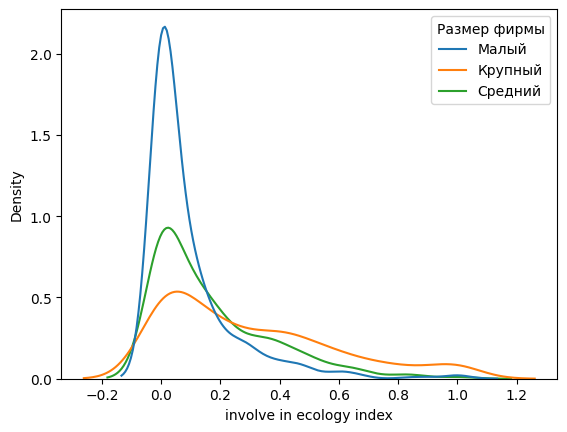

In [49]:
sns.kdeplot(data = data, x='involve in ecology index', hue='Размер фирмы')
data['involve in ecology index']

In [50]:
data[['involve in ecology index', 'В какой степени экологическое регулирование является препятствием в текущей деятельности?']]

,involve in ecology index,В какой степени экологическое регулирование является препятствием в текущей деятельности?
0,0.254620,0.50
1,0.181222,0.50
2,0.053388,0.25
3,0.000000,0.00
4,0.208726,0.50
...,...,...
1318,0.180732,0.50
1319,0.137293,0.25
1320,0.036463,0.00
1321,0.295592,0.00
